# Lab 3: CNN Visualization
<font color="green">

## Team: Aitor Elfau, Abdul Wasay, Sam Yao
</font>

### [3 Points] In groups, you should select a convolutional neural network model that has been pre-trained on a large dataset (preferably, ImageNet). 

<font color="green">
For this lab, we selected VGG as our model for analysis. We chose VGG because of the relatively simple architecture of the neural network. Additionally, it was extensively discussed in class, so we believe that it will be straightforward to analyze a circuit and complete the 
</font>

<font color="green">
The following details about VGG and its advantages for our task were adapated from: https://datagen.tech/guides/computer-vision/vgg16/

Andrew Zisserman and Karen Simonyan first proposed the VGG model in 2013 and created a prototype for the 2014 ImageNet Challenge.

This model differed from previous high-performing models in several ways. First, it used a tiny 3×3 receptive field with a 1-pixel stride—for comparison, AlexNet used an 11×11 receptive field with a 4-pixel stride. The 3×3 filters combine to provide the function of a larger receptive field. 

The benefit of using multiple smaller layers rather than a single large layer is that more non-linear activation layers accompany the convolution layers, improving the decision functions and allowing the network to converge quickly. 

Second, VGG uses a smaller convolutional filter, which reduces the network’s tendency to over-fit during training exercises. A 3×3 filter is the optimal size because a smaller size cannot capture left-right and up-down information. Thus, VGG is the smallest possible model to understand an image’s spatial features. Consistent 3×3 convolutions make the network easy to manage.
    
The VGG16 is a 16-layer deep neural network. Although it has a total of 138 million parameters, the simplicity of the VGGNet16 architecture is its main attraction. 
    
The smallers 3x3 filters will help us easily visualize the activations without requiring a lot of computation power. This combined with the 16 layers gives us a great amount of choice when selecting a layer to get activations from. 

 </font>

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load the pre-trained VGG16 model
model = VGG16()
for layer in model.layers:
    layer.trainable = False

In [7]:
model.save('vgg_model.h5')

/Users/mildlyinterdasting/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###### Done loading the model
<font color="red">
    
# DO NOT RUN ANY OF THE CELLS ABOVE
</font>

<font color="green">
    
# START LOADING FROM THIS CELL DOWNWARDS
</font>

In [2]:
from tensorflow.keras.models import load_model

model = load_model('vgg_model.h5')

2024-03-28 18:36:34.962403: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-03-28 18:36:34.962431: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-03-28 18:36:34.962439: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-03-28 18:36:34.962967: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-28 18:36:34.963507: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Loading Images

<font color="green">
    Here, we send some images through VGG16 to ensure that the classification portion is working correctly. These are some images that were stored locally, and are not associated with ImageNet at all. 

</font>

Image 1


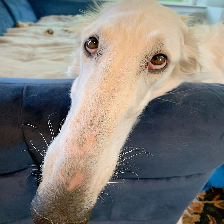

Image 2


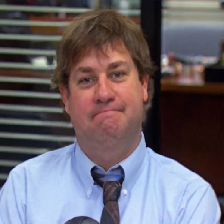

Image 3


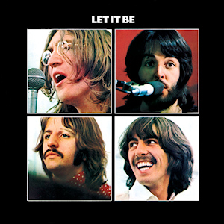

Image 4


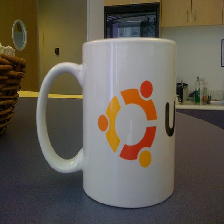

Image 5


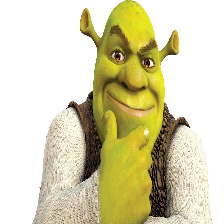

Image 6


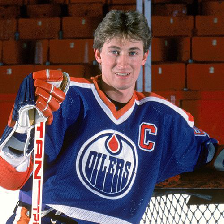

Image 7


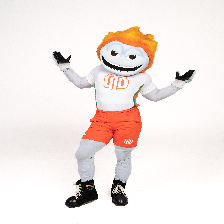

Image 8


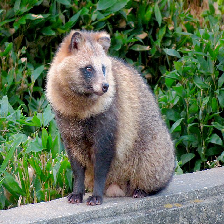

In [6]:
#taken from https://towardsdatascience.com/how-to-use-a-pre-trained-model-vgg-for-image-classification-8dd7c4a4a517

#loading the libraries necessary
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np

#Loading images using image module from keras
img_1 = load_img('images/borzoi.jpg',color_mode='rgb', target_size=(224, 224))
img_2 = load_img('images/fat_halpert.jpg',color_mode='rgb', target_size=(224, 224))
img_3 = load_img('images/let_it_be.jpg',color_mode='rgb', target_size=(224, 224))
img_4 = load_img('images/mug.jpeg',color_mode='rgb', target_size=(224, 224))
img_5 = load_img('images/shrek.jpg',color_mode='rgb', target_size=(224, 224))
img_6 = load_img('images/wayne.jpeg',color_mode='rgb', target_size=(224, 224))
img_7 = load_img('images/temoc.jpeg',color_mode='rgb', target_size=(224, 224))
img_8 = load_img('images/tanuki.jpeg',color_mode='rgb', target_size=(224, 224))

#print images
print("Image 1")
display(img_1)

print("Image 2")
display(img_2)

print("Image 3")
display(img_3)

print("Image 4")
display(img_4)

print("Image 5")
display(img_5)

print("Image 6")
display(img_6)

print("Image 7")
display(img_7)

print("Image 8")
display(img_8)

<font color="green">
    Let's predict what these images are
</font>

In [12]:
# Preprocessing and predicting all the images

# ==========================Image 1 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_1)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_1 = decode_predictions(features)

# ==========================Image 2 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_2)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_2 = decode_predictions(features)

# ==========================Image 3 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_3)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_3 = decode_predictions(features)

# ==========================Image 4 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_4)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_4 = decode_predictions(features)

# ==========================Image 5 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_5)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_5 = decode_predictions(features)

# ==========================Image 6 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_6)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_6 = decode_predictions(features)

# ==========================Image 7 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_7)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_7 = decode_predictions(features)

# ==========================Image 8 ==========================
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img_8)
x.shape
# Adding the fouth dimension, for number of images
x = np.expand_dims(x, axis=0)

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
prediction_8 = decode_predictions(features)

1/1 [==============================] - 0s 14ms/step


In [13]:
# printing out predictions

print(f"Image 1 Prediction: {prediction_1[0][0]} \n")
print(f"Image 2 Prediction: {prediction_2[0][0]} \n")
print(f"Image 3 Prediction: {prediction_3[0][0]} \n")
print(f"Image 4 Prediction: {prediction_4[0][0]} \n")
print(f"Image 5 Prediction: {prediction_5[0][0]} \n")
print(f"Image 6 Prediction: {prediction_6[0][0]} \n")
print(f"Image 7 Prediction: {prediction_7[0][0]} \n")
print(f"Image 8 Prediction: {prediction_8[0][0]} \n")


print("Full predictions:")
print(prediction_1,'\n')
print(prediction_2,'\n')
print(prediction_3,'\n')
print(prediction_4,'\n')
print(prediction_5,'\n')
print(prediction_6,'\n')
print(prediction_7,'\n')
print(prediction_8,'\n')

Image 1 Prediction: ('n02090622', 'borzoi', 0.9999995) 

Image 2 Prediction: ('n02883205', 'bow_tie', 1.0) 

Image 3 Prediction: ('n07248320', 'book_jacket', 0.9999409) 

Image 4 Prediction: ('n04560804', 'water_jug', 0.9997489) 

Image 5 Prediction: ('n03724870', 'mask', 1.0) 

Image 6 Prediction: ('n03141823', 'crutch', 0.9110538) 

Image 7 Prediction: ('n04228054', 'ski', 0.9975326) 

Image 8 Prediction: ('n02441942', 'weasel', 0.9998733) 

Full predictions:
[[('n02090622', 'borzoi', 0.9999995), ('n02091831', 'Saluki', 4.3859936e-07), ('n02099601', 'golden_retriever', 1.2976836e-16), ('n02099712', 'Labrador_retriever', 1.5947525e-18), ('n02100735', 'English_setter', 7.648554e-19)]] 

[[('n02883205', 'bow_tie', 1.0), ('n03124170', 'cowboy_hat', 5.386964e-09), ('n03630383', 'lab_coat', 1.4219952e-10), ('n03814639', 'neck_brace', 1.3718769e-10), ('n04355933', 'sunglass', 1.8888582e-12)]] 

[[('n07248320', 'book_jacket', 0.9999409), ('n06359193', 'web_site', 5.8967533e-05), ('n04404412'

<font color="green">
    Although these images aren't located in image net whatsoever, they were still able to make predictions of these images, although all but two of them were off (for example, there is no class specifically for tanukis, which are commonly mistaken for raccoons in America).
</font>

### [4 Points] Select a multi-channel filter (i.e., a feature) in a layer in which to analyze as part of a circuit. This should be a multi-channel filter in a "mid-level" portion of the network (that is, there are convolutional layers before and after this chosen layer). You might find using OpenAI microscope a helpful tool for selecting a filter to analyze without writing too much code: https://microscope.openai.com/models/ Links to an external site. 

- Using image gradient techniques, find an input image that maximally excites this chosen multi-channel filter. General techniques are available from class: https://github.com/8000net/LectureNotesMaster/blob/master/04%20LectureVisualizingConvnets.ipynb Links to an external site.
- Also send images of varying class (i.e., from ImageNet) through the network and track which classes of images most excite your chosen filter. 
- Give a hypothesis for what this multi-channel filter might be extracting. That is, what do you think its function is in the network? Give reasoning for your hypothesis. 
- If using code from another source or a LLM, you should heavily document the code so that I can grade your understanding of the code used. 

In [3]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

<font color="green">
    For the purposes of this section, we want to use layer 'block5_conv2', as it is deeper within the neural network, and it is preceded and succeeded by another convolutional filter (as per the instructions). We are also interested in seeing what VGG learns in this filter deep within the network, as the excitations should (in theory) get more specific the deeper we go. In terms of filter number, let's go with filter number 2.
</font>

In [4]:
import matplotlib.pyplot as plt

# Taken from Dr. Larson's notebook. Helper function to visualize images 
def prepare_image_for_display(img, norm_type='max'):
    if norm_type == 'max':
        # min/max scaling, best for regular images
        new_img = (img - img.min()) / (img.max()-img.min())
    else:
        # std scaling, best when we are unsure about large outliers
        new_img = ((img - img.mean()) / (img.std() +1e-3))*0.15 + 0.5
        
    new_img *= 255
    new_img = np.clip(new_img, 0, 255)
    
    if len(new_img.shape)>3:
        new_img = np.squeeze(new_img)
        
    return new_img.astype('uint8')

<font color="green">
    Create the base image that can maximally excite a layer.
</font>

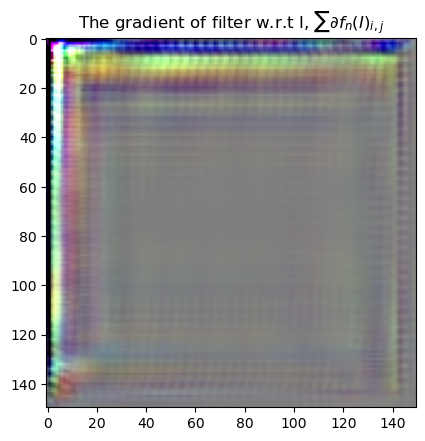

In [7]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models
from tensorflow.keras.applications.vgg16 import preprocess_input

# Load the pre-trained VGG16 model
model = VGG16(weights='imagenet', include_top=False, input_tensor=None)

# set VGG to be frozen
for layer in model.layers:
    layer.trainable = False

# Selecting a layer and channel to visualize
layer_name = 'block5_conv2'
filter_index = 2
 
# Isolate the output of interest and create new model
layer_output = model.get_layer(layer_name).output
new_model = models.Model(inputs=model.input, outputs=layer_output)
# now "new_model" has the output we desire to maximize

# create a variable that we can access and update in computation graph
I = tf.Variable(np.zeros((1, 150, 150, 3),dtype='double'), name='image_var', dtype = 'float64')

# now use gradient tape to get the gradients (watching only the variable v)
with tf.GradientTape(watch_accessed_variables=False) as tape:
    tape.watch(I) # watch
    model_vals = new_model(preprocess_input(I)) # get output
    filter_output_to_maximize = tf.reduce_mean(model_vals[:, :, :, filter_index]) # define what we want to maximize
    
grad_fn = tape.gradient(filter_output_to_maximize, I) # get gradients that influence loss w.r.t. v
grad_fn /= (tf.sqrt(tf.reduce_mean(tf.square(grad_fn))) + 1e-5) # mean L2 norm (better stability)

# now show the gradient, same size as input image
plt.imshow(prepare_image_for_display( grad_fn.numpy(), norm_type='std'))
plt.title('The gradient of filter w.r.t I, $ \sum\partial f_n(I)_{i,j} $ ')
plt.show()

<font color="green">
    We then use gradient ascent to determine what maximally excites the neural network at a certain layer. As previously stated, we decided to look at what maximally excites filter 2 of layer 'block5_conv2'.
</font>

In [1]:
#Method from Dr. Larson's notebook to generate an image pattern from the filter.

def generate_pattern(layer_name, filter_index, size=150):
    # Build a model that outputs the activation
    # of the nth filter of the layer considered.
    layer_output = model.get_layer(layer_name).output
    # Isolate the output 
    new_model = models.Model(inputs=model.input, outputs=layer_output)
    
    # We start from a gray image with some uniform noise
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    I_start = tf.Variable(input_img_data, name='image_var', dtype = 'float64')
    I = preprocess_input(I_start) # only process once
    # Run gradient ascent for 40 steps
    eta = 1.
    for i in range(40):
        with tf.GradientTape(watch_accessed_variables=False) as tape:
            tape.watch(I)
            # get variable to maximize 
            model_vals = new_model(I) 
            filter_output = tf.reduce_mean(model_vals[:, :, :, filter_index])

        # Compute the gradient of the input picture w.r.t. this loss
        # add this operation input to maximize
        grad_fn = tape.gradient(filter_output, I)
        # Normalization trick: we normalize the gradient
        grad_fn /= (tf.sqrt(tf.reduce_mean(tf.square(grad_fn))) + 1e-5) # mean L2 norm
        I += grad_fn * eta # one iteration of maximizing
        
    # return the numpy matrix so we can visualize 
    img = I.numpy()
    return prepare_image_for_display(img, norm_type='std')

<font color="green">
    We can look at the dimensions of the filter with the following code.
</font>

In [26]:
#  lets look at the shapes of some of the filters above
keras_layer = model.get_layer('block5_conv2')
layer_output = keras_layer.output
weights_list = keras_layer.get_weights() # list of filter, the biases
filters = weights_list[0]
biases = weights_list[1]

# print out some specifics of how the filter is saved
print('block5_conv2 activation size is ', layer_output.get_shape(), '(batch x H x W x filter)')
print('block5_conv2 filters is of shape',filters.shape, '...(k x k x channels x filters)')
print('block5_conv2 biases is of shape',biases.shape)

idx = 32
print('one filter in block5_conv2 is ', filters[:,:,:,idx].shape )
channel = 2
print('one channel in the the filter is', filters[:,:,channel,idx].shape)
print('The weights of that channel in the filter are:\n', filters[:,:,channel,idx])
print('The bias of the filter is:',biases[idx])

block5_conv2 activation size is  (None, None, None, 512) (batch x H x W x filter)
block5_conv2 filters is of shape (3, 3, 512, 512) ...(k x k x channels x filters)
block5_conv2 biases is of shape (512,)
one filter in block5_conv2 is  (3, 3, 512)
one channel in the the filter is (3, 3)
The weights of that channel in the filter are:
 [[ 0.00224925  0.00409836  0.00506661]
 [-0.00164222 -0.00443749 -0.00402988]
 [-0.00815861 -0.01823329 -0.01269925]]
The bias of the filter is: 0.010928879


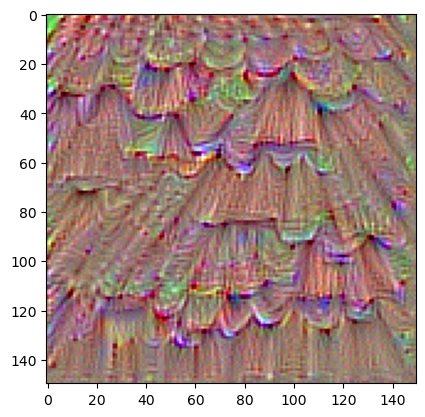

In [27]:
plt.imshow(generate_pattern('block5_conv2', 2))
plt.show()

<font color="green">
    We hypothesize that this filter may be extracting feathers, or even shingles on a roof, perhaps even pine trees. This is because of the straight edges with curved sides that are seen in the filter. It looks like a pine tree at first glance, but it could also be a number of things that vaguely look the shape, such as the tails of birds, or even a rooftop due to the layered nature of the shapes. We thus hypothesize that this filter's function is to detect objects that are layered on top of each other, such as shingles or feathers.<br><br>
</font>

<font color="green">
    Next, we'll send some images through the model to see what maximally excites this filter.<br><br>
</font>


### (1) select a subset of images from ImageNet that are from many different classes 
<font color="green"> We tried accessing the images within imagenet and it kept failing, hence I downloaded some images that matched the patterns according to our hypothesis. And ran it through VGG to get an output for our filters. </font>

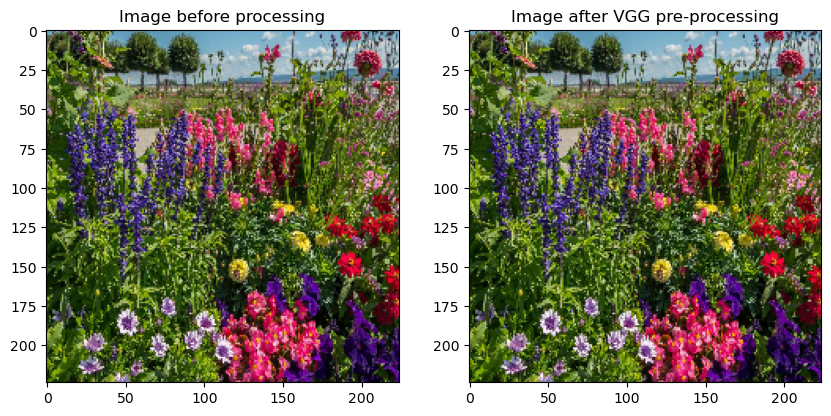

1/1 [==============================] - 0s 315ms/step
Predicted: [('n03930313', 'picket_fence', 0.99051297), ('n03457902', 'greenhouse', 0.009440289), ('n03991062', 'pot', 4.6769153e-05)]


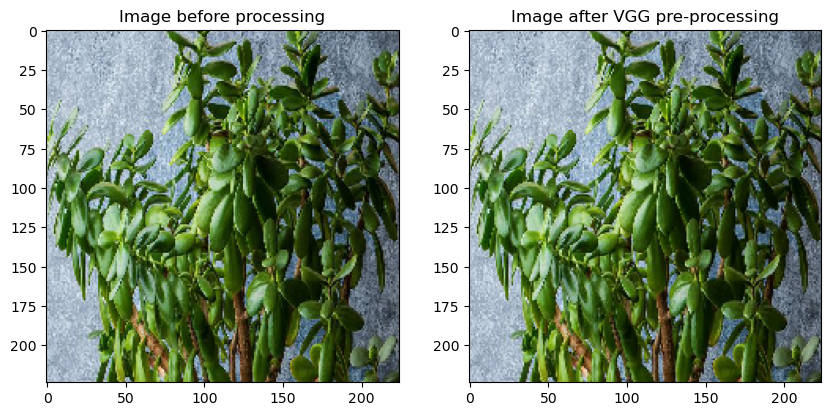

1/1 [==============================] - 0s 21ms/step
Predicted: [('n03991062', 'pot', 1.0), ('n03930313', 'picket_fence', 5.236436e-12), ('n03980874', 'poncho', 1.7586476e-14)]


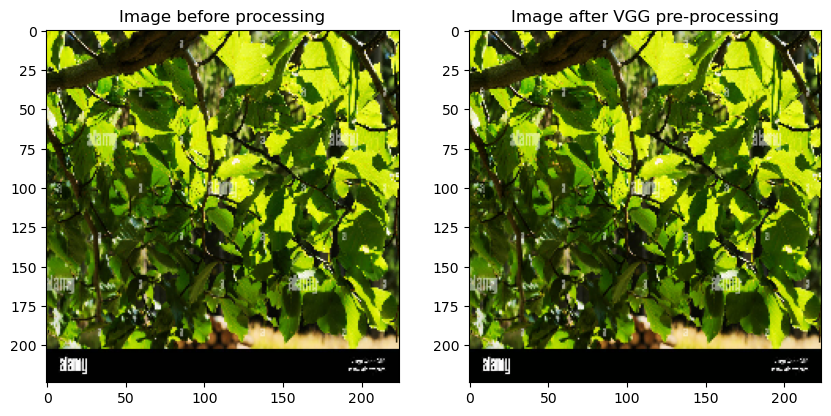

1/1 [==============================] - 0s 15ms/step
Predicted: [('n03782006', 'monitor', 0.9999088), ('n04152593', 'screen', 9.122819e-05), ('n04404412', 'television', 2.0769804e-08)]


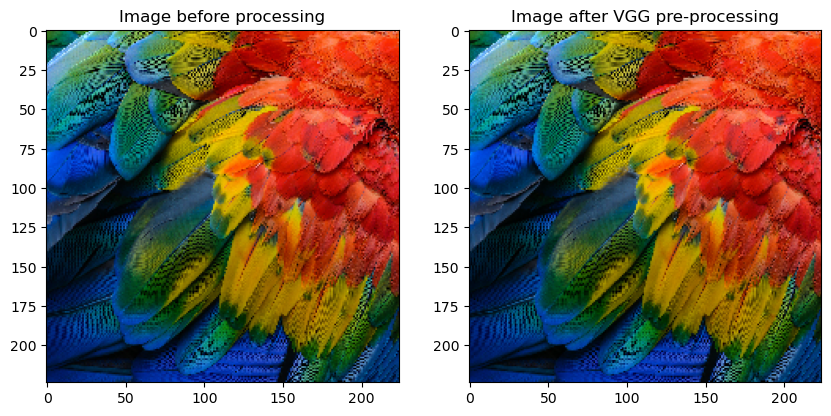

1/1 [==============================] - 0s 17ms/step
Predicted: [('n01818515', 'macaw', 0.99997306), ('n03325584', 'feather_boa', 2.6900716e-05), ('n04325704', 'stole', 1.0989768e-14)]


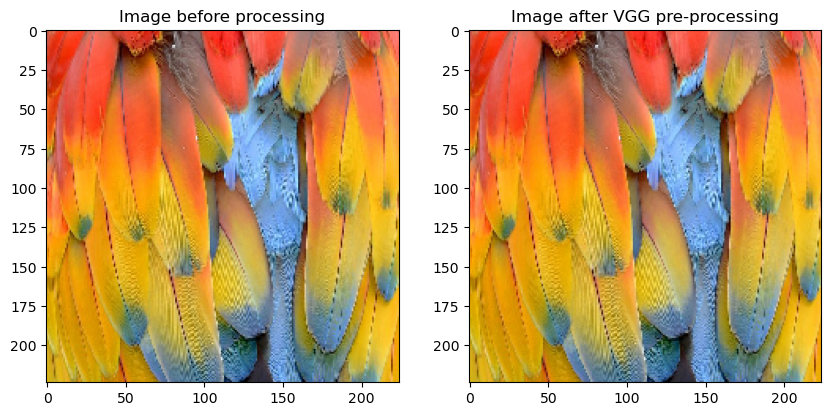

1/1 [==============================] - 0s 15ms/step
Predicted: [('n01818515', 'macaw', 0.9999101), ('n04367480', 'swab', 8.9831075e-05), ('n04522168', 'vase', 2.6853855e-09)]


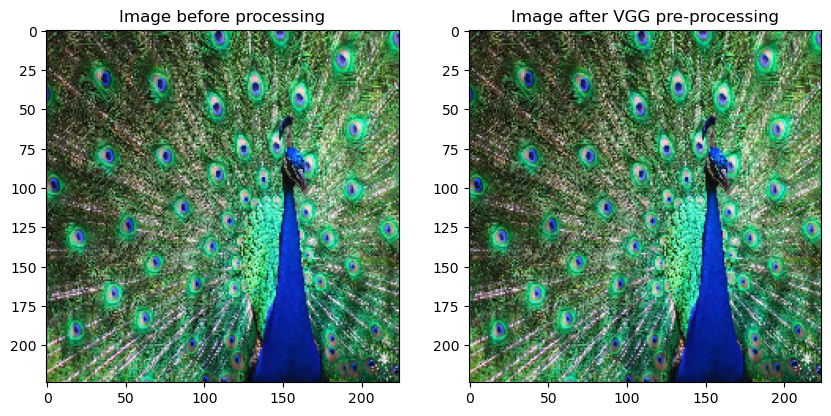

1/1 [==============================] - 0s 15ms/step
Predicted: [('n09229709', 'bubble', 0.99724704), ('n01806143', 'peacock', 0.0027525062), ('n04325704', 'stole', 4.200458e-07)]


In [16]:
##LOAD VGG16

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
import matplotlib.pyplot as plt

# Load the VGG16 model
model = VGG16(weights='imagenet')

#FUNCTION FOR DISPLAYING IMAGES

def prepare_image_for_display(img):
    # Undo preprocessing steps of VGG16 for display purposes
    img += [103.939, 116.779, 123.68]
    img = img[:, :, ::-1]  # BGR to RGB
    img = np.clip(img, 0, 255).astype('uint8')
    return img


def load_and_predict_image(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return preprocess_input(img_array_expanded_dims)

def process_and_predict(images):
    for img_path in images:
        processed_img = load_and_predict_image(img_path)
        
        # Display image before and after preprocessing
        plt.figure(figsize=(10,5))
        plt.subplot(1,2,1)
        plt.imshow(image.load_img(img_path, target_size=(224, 224)))
        plt.title('Image before processing')
        
        plt.subplot(1,2,2)
        plt.imshow(prepare_image_for_display(processed_img[0]))
        plt.title('Image after VGG pre-processing')
        plt.show()
        
        # Predict
        preds = model.predict(processed_img)
        print('Predicted:', decode_predictions(preds, top=3)[0])

        
        
# Arrays of image paths
plant_image_paths = ['plant1.jpg', 'plant2.jpg', 'plant3.jpg']
bird_image_paths = ['Bird1.jpg', 'Bird2.jpg', 'Bird3.jpg']

# Example usage
process_and_predict(plant_image_paths)
process_and_predict(bird_image_paths)


### (2) create an output tensor to the model for your chosen filter 


<font color="green">
    We now calculate the activations for for each prediction. The filter activation score is measured by taking the average of the activations for that particular filter. 
</font>

In [37]:
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img


In [38]:
def get_filter_activation(model, img, filter_index):
    activations = model.predict(img)
    # Assuming the filter activation is the mean across the spatial dimensions
    filter_activation = np.mean(activations[:, :, :, filter_index])
    return filter_activation

### (3) send all the images through and save the output activations for your filter 
    
### (4) take the average magnitude of the activations 


In [45]:
plant_image_paths = ['plant1.jpg', 'plant2.jpg', 'plant3.jpg']
bird_image_paths = ['Bird1.jpg', 'Bird2.jpg', 'Bird3.jpg']

plant_activations = []
for img_path in plant_image_paths:
    img = load_and_preprocess_image(img_path)
    activation = get_filter_activation(model, img, filter_index=2)  # For the 3rd filter
    plant_activations.append(activation)

bird_activations = []
for img_path in bird_image_paths:
    img = load_and_preprocess_image(img_path)
    activation = get_filter_activation(model, img, filter_index=2)
    bird_activations.append(activation)

# Analyze which class of images excites the chosen filter more
avg_plant_activation = np.mean(plant_activations)
avg_bird_activation = np.mean(bird_activations)

print(f"Average plant activations: {avg_plant_activation}")
print(f"Average bird activations: {avg_bird_activation}")


1/1 [==============================] - 0s 14ms/step
Average plant activations: 1.0695879459381104
Average bird activations: 2.3263633251190186



    
###   (5) see what images resulted in the largest magnitudes.

<font color="green"> The results from the code indicate that, on average, the selected filter in the convolutional neural network model is more strongly activated by images of birds than by images of plants. This is somewhat promising for our hypothesis that the filter is excited by layered objects, in this case, feathers.</font>

### [4 Points] Analyze each channel of the multi-channel filter to better understand how this might form a circuit (i.e., the weights of the filter). That is, visualize the convolutional filter (one channel at a time) between the input activations and the current activation to understand which inputs make up a circuit. You should avoid filter channels that are mostly "zero" coefficients. These are not influential for the circuit. One method of doing this is given below:

 - Extract the filter coefficients for each input activation to that multi-channel filter. Note: If the multi-channel filter is 5x5 with an input channel size of 64, then this extraction will result in 64 different single channel filters, each of size 5x5. 
 - Keep the top ten sets of inputs with the "strongest" weights. For now, you can use the L2 norm of each input filter as a measure of strength. Visualize these top ten filters. 
 - For these ten strongest input filters, categorize each as "mostly inhibitory" or "mostly excitatory." That is, does each filter consist of mostly negative or mostly positive coefficients?



<font color="green">
    Here is the extraction process for the input activations for filter 2 of block5_conv2. There are 512 input activations that are of dimension 3x3, and we separate out the strongest weights after L2 normalization. 
</font>

In [9]:
layer_name = 'block5_conv2'
filter_index = 2  # Adjust based on which filter you're interested in

# Get the weights (filters) and biases for the chosen layer
filters, biases = model.get_layer(layer_name).get_weights()

# Now, filters has shape [filter_height, filter_width, in_channels, out_channels]
# Extract the specific filter across all input channels
specific_filter = filters[:, :, :, filter_index]

In [10]:
# Calculate the L2 norm for each input channel's filter
l2_norms = np.sqrt(np.sum(np.square(specific_filter), axis=(0, 1)))

# Sort the channels based on the strength (L2 norm) and keep the top 10
top_ten_indices = np.argsort(l2_norms)[-10:]

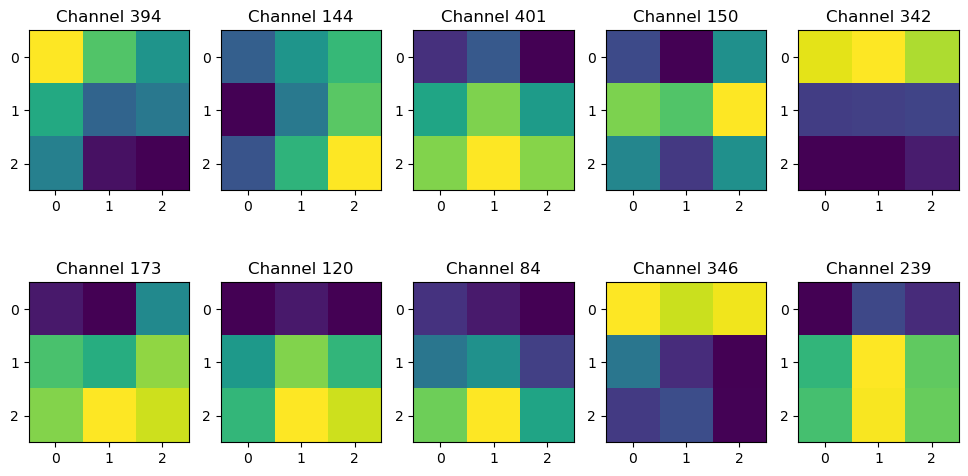

In [11]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    # Index of the top filter
    idx = top_ten_indices[i]
    
    # Extract and plot the filter
    filter_weights = specific_filter[:, :, idx]
    ax.imshow(filter_weights, cmap='viridis')
    ax.set_title(f"Channel {idx}")
    ax.axis('on')

plt.show()


<font color="green">
    Our categorization strategy to classify the filters as most inhibitory or excitatory was to add all of the weights for the filters together, and if the sum of the negative filters was larger than the sum of the positive filters, the filter was mostly inhibitory, else it was mostly excitatory.   
</font>

In [12]:
def categorize_filter(filter_weights):
    positive_sum = np.sum(filter_weights[filter_weights > 0])
    negative_sum = np.sum(filter_weights[filter_weights < 0])
    
    if np.abs(negative_sum) > positive_sum:
        return "mostly inhibitory"
    else:
        return "mostly excitatory"

# Using top_ten_indices from previous steps to identify top filters
categories = [categorize_filter(specific_filter[:, :, idx]) for idx in top_ten_indices]


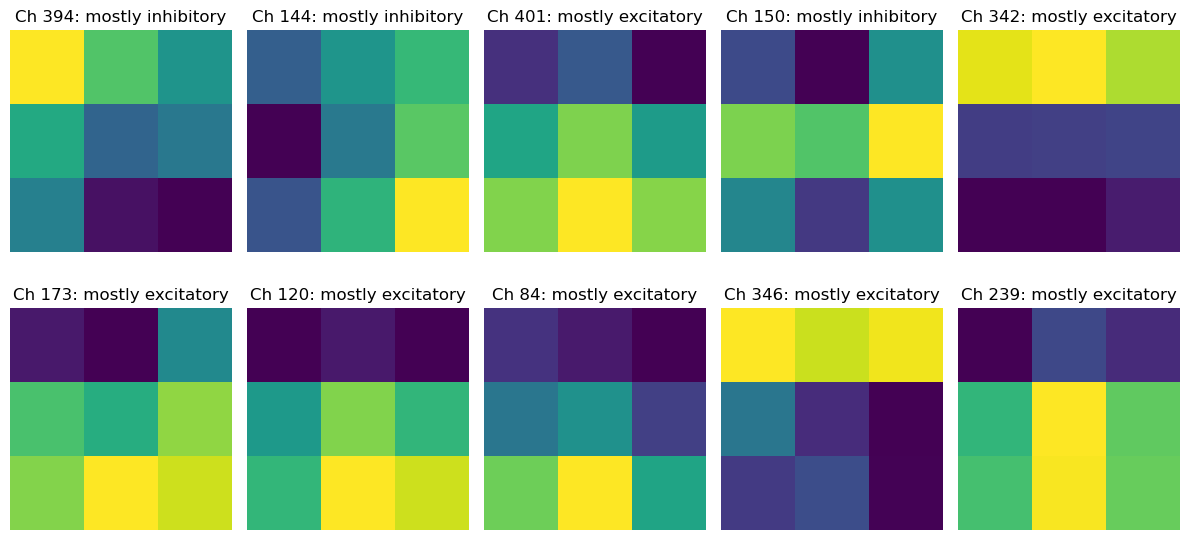

In [13]:
#Visualizing the filters.

fig, axes = plt.subplots(2, 5, figsize=(12, 6))

for i, ax in enumerate(axes.flat):
    idx = top_ten_indices[i]
    filter_weights = specific_filter[:, :, idx]
    category = categorize_filter(filter_weights)
    
    ax.imshow(filter_weights, cmap='viridis')
    ax.set_title(f"Ch {idx}: {category}")
    ax.axis('off')

plt.tight_layout()
plt.show()


<font color="green"> 
This visualization helps us understand which input channels (features detected in previous layers) contribute most significantly to the activation of the chosen filter. Channels with "stronger" weights (higher L2 norms) are considered more influential in determining the filter's response. Filters that are mostly zeros (which we are not showing i.e. showing top 10) indicate less influence or sensitivity to the corresponding input features.
<br><br>
Mostly Excitatory Filters: These filters have a predominance of positive weights. They are likely to increase the neuron's output in response to patterns matching the filter's weights. This suggests that the features represented by these filters contribute positively to the activation of the filter they feed into.
<br><br>
Mostly Inhibitory Filters: These filters are characterized by mostly negative weights. They tend to suppress the neuron's output for matching input patterns, indicating that the features they detect are likely to reduce the activation of the subsequent neuron.      
<br><br>
Given that darker colors (blue and purple) mean lower activation and brighter colors (green and yellow) mean higher activations, we can see that our filters are mostly excitatory. 
<br><br>
</font>

### [4 Points] For each of the ten chosen single channels of the filter, use image gradient techniques to visualize what each of these filters is most excited by (that is, what image maximally excites each of these filters?). This is a similar analysis to the first step in this rubric, but now isolating the activations the layer preceding your chosen filter. This should only be completed for the ten most influential filters.  

Use these visualizations, along with the circuit weights you just discovered to try and explain how this particular circuit works. An example of this visualization style can be seen here: https://storage.googleapis.com/distill-circuits/inceptionv1-weight-explorer/mixed3b_379.html 

Links to an external site. 
Try to define the properties of this circuit using vocabulary from https://distill.pub/2020/circuits/zoom-in/
Links to an external site. (such as determining if this is polysemantic, pose-invariant, etc.)  
Relate your visualizations back to your original hypothesis about what this filter is extracting. Does it support or refute your hypothesis? Why? 

<font color="green"> 
    We come back to using the gradient ascent techniques used earlier to visualize what those input activations look like.
</font>

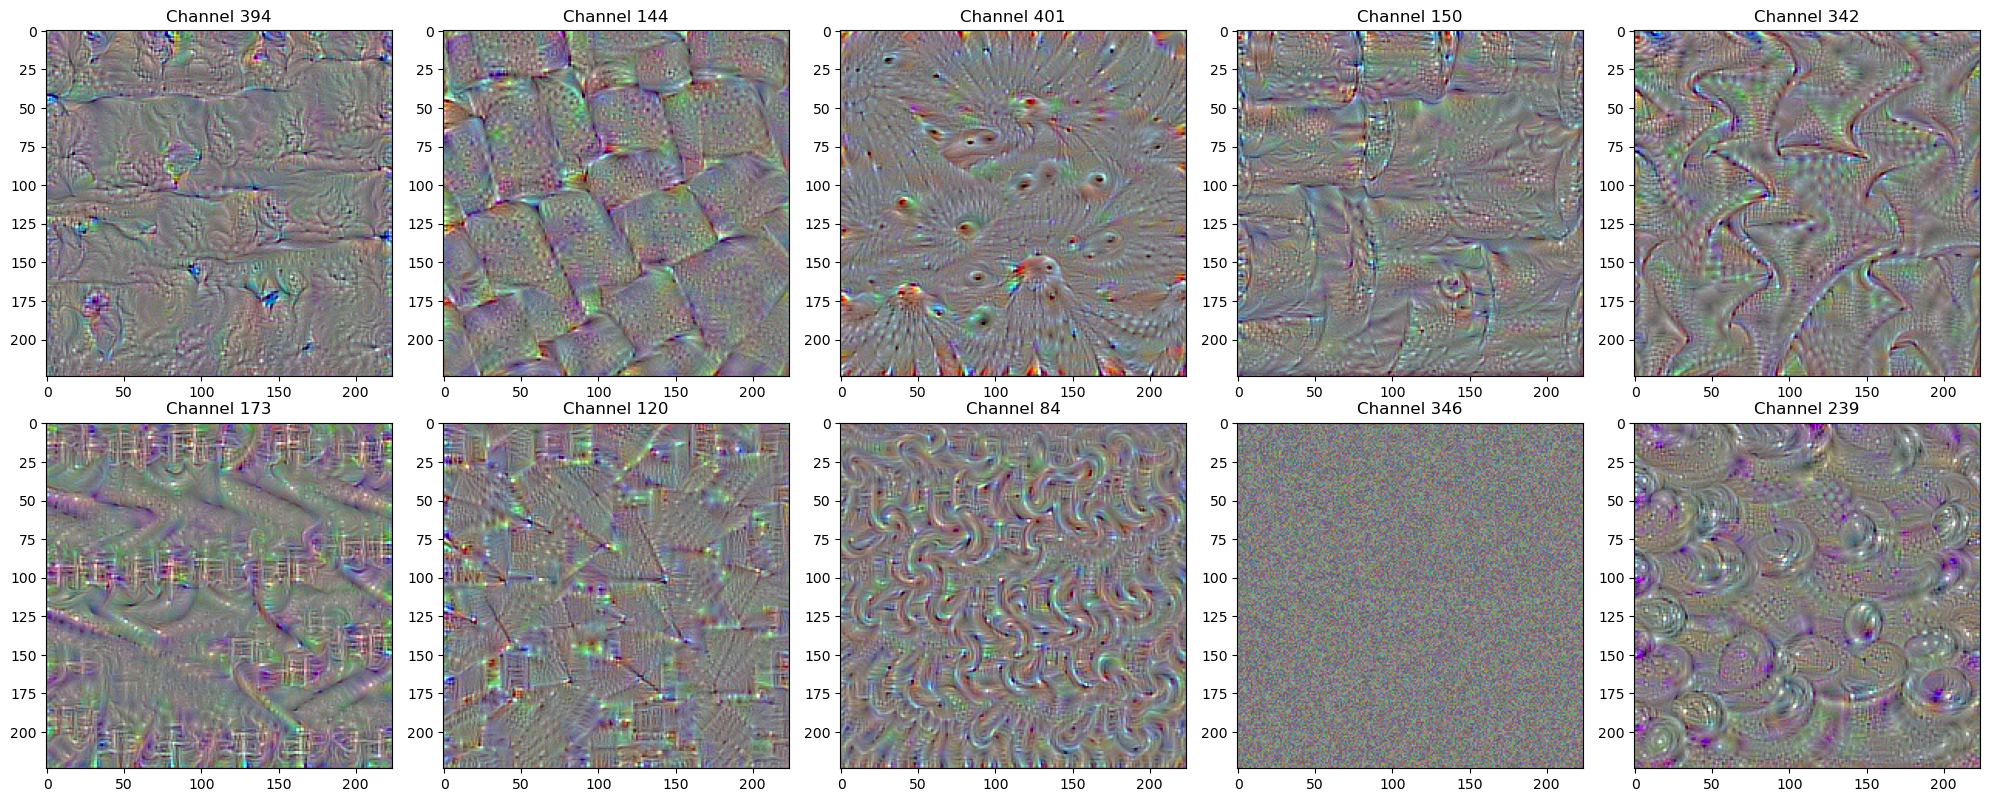

In [69]:
def generate_pattern_for_channel(layer_name, channel_index, model, size=224, iterations=40, step=1.0):
    # Redefine the model to output at the specified layer
    layer_output = model.get_layer(layer_name).output
    activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_output)
    
    # Start from a gray image with some noise
    input_img_data = tf.random.uniform((1, size, size, 3), dtype=tf.float32) * 20 + 128.
    input_img_data = tf.Variable(input_img_data)

    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(input_img_data)
            # Extract the entire layer output, then isolate the specific channel
            all_channels_output = activation_model(input_img_data)
            loss = tf.reduce_mean(all_channels_output[:, :, :, channel_index])
        
        # Compute the gradients and normalize
        grads = tape.gradient(loss, input_img_data)
        # Normalization trick: we normalize the gradient
        grads /= (tf.sqrt(tf.reduce_mean(tf.square(grads))) + 1e-5)

        # Gradient ascent step
        input_img_data.assign_add(grads * step)

    # Convert to numpy array and deprocess for visualization
    img = input_img_data.numpy()[0]
    return deprocess_image(img)


def deprocess_image(x):
    # Normalize tensor: center on 0, ensure std is 0.1
    x -= np.mean(x)
    x /= (np.std(x) + 1e-5)
    x *= 0.1

    # Clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # Convert to RGB
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x


# Visualize the patterns for the top 10 influential channels
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
for i, ax in enumerate(axes.flat):
    channel_index = top_ten_indices[i]
    img = generate_pattern_for_channel(layer_name=layer_name, channel_index=channel_index, model=model)
    ax.imshow(img)
    ax.set_title(f"Channel {channel_index}")
    ax.axis('on')
plt.tight_layout()
plt.show()

<font color="green"> 
    The process of visualizing the patterns that maximally excite the most influential channels within a specific convolutional filter of a neural network has provided insight into what features the network has learned to detect. Initially, we hypothesized  that the selected channel was detecting feature characteristics of feathers, leaves, or birds — elements that possess a distinct texture and form. <br><br>
</font>

    
<font color="green"> 
    However, the outcomes of the gradient ascent process, applied to the ten most influential channels of the chosen filter, revealed patterns that are  different from the initial expectations. Instead of the organic, irregular patterns like those of  feathers or leaves, the images predominantly displayed structures resembling a pattern characterized by regularity and repetition - like a chain-link fence of different shapes that connect with each other. This could be classified as a texture detector, or a pattern recognizer. <br><br> 
</font>

<font color="green"> 
    The circuit formed by the specific filter, has learned to recognize and respond to patterns of shapes that occur regularly and repetitively within an image.
</font>

In [14]:
print("hello")

hello
